In [6]:
import matplotlib.pyplot as plt
import numpy as np

from datetime import timedelta

In [7]:
# Open the files for reading
with open('/cluster/work/grlab/projects/metagenome/data/BIGSI/subsets/sshash/bench/brwt/res_kmers/all_times.txt', 'r') as file:
    sshash_lines = file.readlines()
with open('/cluster/work/grlab/projects/metagenome/data/BIGSI/subsets/sshash/bench/brwt/res_superkmers/all_times.txt', 'r') as file:
    sk_lines = file.readlines()
with open('/cluster/work/grlab/projects/metagenome/data/BIGSI/subsets/sshash/bench/brwt/res_pure_superkmers/all_times.txt', 'r') as file:
    psk_lines = file.readlines()
with open('/cluster/work/grlab/projects/metagenome/data/BIGSI/subsets/sshash/bench/brwt/res_succ/all_times.txt', 'r') as file:
    succ_lines = file.readlines()
    
# Stop if there are not 7*N measurements
if len(sshash_lines) % 8 != 0:
    print("Number of lines (in sshash_lines file) is not multiple of 8! Stopping")
if len(sk_lines) % 8 != 0:
    print("Number of lines (in sk_lines file) is not multiple of 8! Stopping")
if len(psk_lines) % 8 != 0:
    print("Number of lines (in psk_lines file) is not multiple of 8! Stopping")

In [8]:
def time_to_seconds(time_str):
    # Split the time string into hours, minutes, and seconds
    parts = time_str.split(':')
    
    # If the time format is h:mm:ss
    if len(parts) == 3:
        hours, minutes, seconds = map(float, parts)
        total_seconds = hours * 3600 + minutes * 60 + seconds
    # If the time format is m:ss
    elif len(parts) == 2:
        minutes, seconds = map(float, parts)
        total_seconds = minutes * 60 + seconds
    else:
        print(parts)
        raise ValueError("Invalid time format")
    
    return total_seconds

def compute_avg_time(sizes, times, lines, idx):
    #first line is subset size
    size = lines[idx]
    time = 0
    
    # lines[1:3] are warm-up runs
    for j in range(3,8):
        time_str = lines[idx+j].strip().split("Elapsed (wall clock) time (h:mm:ss or m:ss): ",1)[-1]
        time = time + time_to_seconds(time_str)
    avg_time = time / 5
    sizes.append(size)
    times.append(avg_time)

In [9]:
# Initialize lists to store times for each series
sshash_times = []
sshash_sizes = []
sk_times = []
sk_sizes = []
psk_times = []
psk_sizes = []

succ_times = []
succ_sizes = []

for i in range(0,len(sshash_lines),8):
    compute_avg_time(sshash_sizes,sshash_times,sshash_lines,i)
for i in range(0,len(sk_lines),8):
    compute_avg_time(sk_sizes,sk_times,sk_lines,i)
for i in range(0,len(psk_lines),8):
    compute_avg_time(psk_sizes,psk_times,psk_lines,i)

for i in range(0,len(succ_lines),8):
    compute_avg_time(succ_sizes,succ_times,succ_lines,i)

In [10]:
print("Times for superkmer:")
for time in sk_times:
    print(time)
print("\nTimes for pure superkmer:")
for time in psk_times:
    print(time)
print("\nTimes for kmer:")
for time in sshash_times:
    print(time)
print("\nTimes for succ:")
for time in succ_times:
    print(time)

Times for superkmer:
1.3519999999999999
3.2920000000000003
5.388
7.564000000000002
8.3
9.408000000000001
12.404
12.474
13.907999999999998

Times for pure superkmer:
1.418
3.246
4.912
6.697999999999999
7.948
9.582
10.088
12.09
12.916

Times for kmer:
1.518
4.176
6.7620000000000005
8.842
9.591999999999999
13.916
15.209999999999999
16.564
16.9

Times for succ:
4.061999999999999
8.280000000000001
11.778
14.936000000000002
18.2
19.886000000000003
22.749999999999996
26.308000000000003
28.6


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


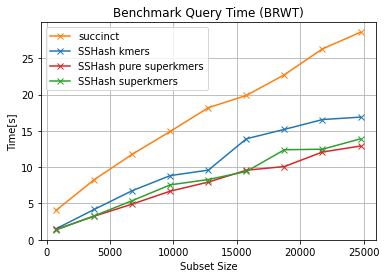

In [11]:
# Plot the two series
plt.plot(np.asarray(succ_sizes,dtype=np.int32), np.asarray(succ_times), label='succinct', marker='x', color='tab:orange')
plt.plot(np.asarray(sshash_sizes,dtype=np.int32), np.asarray(sshash_times), label='SSHash kmers', marker='x', color='tab:blue')
plt.plot(np.asarray(psk_sizes,dtype=np.int32), np.asarray(psk_times), label='SSHash pure superkmers', marker='x', color='tab:red')
plt.plot(np.asarray(sk_sizes,dtype=np.int32), np.asarray(sk_times), label='SSHash superkmers', marker='x', color='tab:green')
plt.xlabel('Subset Size')
plt.ylabel('Time[s]')
plt.grid()
plt.title('Benchmark Query Time (BRWT)')
plt.legend()
plt.savefig("plot_query_bench_sshash_versions_brwt.eps",format='eps')
plt.show()
